In [2]:
import re
import requests
import json
import sqlite3
import glob
import urllib.parse
from bs4 import BeautifulSoup
import MeCab as mc
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [5]:

conn = None

#  データベースに接続する
def connect():
    global conn
    conn = sqlite3.connect('./sample.db')

def close():
    conn.close()
    
def create_table():
    conn.execute('DROP TABLE IF EXISTS countries')
    conn.execute("""CREATE TABLE countries (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            country_name text,
            content text
            )""")
# def create_table():
#     conn.execute('DROP TABLE IF EXISTS docs')
#     conn.execute('''CREATE TABLE IF EXISTS docs (
#             id        INTEGER PRIMARY KEY AUTOINCREMENT,
#             content   TEXT,
#             meta_info BLOB,
#             sentence  BLOB,
#             chunk     BLOB,
#             token     BLOB
#             )''')

#  Countriesテーブルにレコードを挿入
def load(name, content):
    conn.execute(
        'INSERT INTO countries (country_name, content) VALUES (?, ?)', (name, content))
    conn.commit()
    
def get(doc_id, fl):
    row_ls = conn.execute(
        'SELECT {} FROM docs WHERE id = ?'.format(','.join(fl)), (doc_id,)).fetchone()
    row_dict = {}
    for key, value in zip(fl, row_ls):
        row_dict[key] = value
    return row_dict

def get_content(name, limit, offset=0):
    return [record[0] for record in 
               conn.execute(
            'SELECT content FROM countries WHERE country_name = ? LIMIT ? OFFSET ?',
            (name, limit, offset))]

def get_all_contents(limit, offset=0):
    return [record[0] for record in 
               conn.execute(
            'SELECT content FROM countries LIMIT ? OFFSET ?',
            (limit, offset))]


In [ ]:
if __name__ == "__main__":
    connect()
    create_table()
    close()

In [44]:
url = "https://ja.wikipedia.org/wiki/%E5%9B%BD%E3%81%AE%E4%B8%80%E8%A6%A7"
header = "https://ja.wikipedia.org"

r = requests.get(url)
bs = BeautifulSoup(r.text, "html.parser")
table = bs.find("table", class_="wikitable")

connect()
create_table()
for tr in table.find_all("tr"):
    a = tr.find_all("a")
    if a:
        name = a[1].text
        link = a[1].get("href")
        res = requests.get(header + link)
        load(name, res.text)
close()

In [8]:
connect()
html = get_content(name="日本国", limit=1)
soup = BeautifulSoup(html[0], "html.parser")
print(html)
close()

['<!DOCTYPE html>\n<html class="client-nojs" lang="ja" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>日本 - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"日本","wgTitle":"日本","wgCurRevisionId":72823278,"wgRevisionId":72823278,"wgArticleId":1864744,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["外部リンクがリンク切れになっている記事/2018年3月","Webarchiveテンプレートのarchiveisリンク","出典を必要とする記事/2018年2月","Webarchiveテンプレートのウェイバックリンク","外部リンクがリンク切れになっている記事/2010年1月-4月","ISBNマジックリンクを使用しているページ","編集半保護中の記事","正確性","Div colで3列を指定しているページ","出典を必要とする記述のある記事/2016年5月","書きかけの節のある項目",\n"言葉を濁した記述のある記事 (いつ)/2011年","出典を必要とする記述のある記事/2016年9月","Reflistで3列を指定しているページ","日本","島国","現存する君主国","G8加盟国"],"wgBreakFrames":!1,"wgPageContentLanguage":"ja","wgPageContentModel":"wikitext"

In [9]:
content = soup.find(id="content").text
sentence = re.sub("[[^\x01-\x7E]|\w]+", "", content)
mecab = mc.Tagger("-ochasen")
print(mecab.parse(sentence))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
mecab = mc.Tagger("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd -Owakati")
print(mecab.parse(sentence))

日本 出典 フリー 百科事典 『 ウィキペディア （） 』 ナビゲーション に 移動 検索 に 移動 その他 の 用法 について は 「 日本 曖昧さ回避 」 、 「 日本国 曖昧さ回避 」 を ご覧 ください 。 日本国 注 日本国 （ 国旗 ） （ 国章 （ 慣例 上 ） ） 国 の 標語 ： 特に なし 国歌 ： 君が代 公用語 日本語 （ 事実上 ） 首都 東京都 （ 事実上 ） 最大 の 都市 東京特別区 （ 区 を 一つ の 自治体 と 見なす 場合 ） 政府 天皇 徳仁 内閣総理大臣 安倍晋三 国会 衆議院議長 大島理森 国会 参議院議長 伊達忠一 最高裁判所長官 大谷直人 面積 総計 （ 位 ） 水面 積 率 人口 総計 （ 年 ） 億 万 人 （ 位 ） 人口密度 人 （ 自国通貨 表示 ） 合計 （ 年 ） 名目 兆 億 円 合計 （ 年 ） 兆 億 ドル （ 位 ） 合計 （ 年 ） 兆 億 ドル （ 位 ） 人 あたり ドル 建国 諸説 あり 日本神話 による 初代 ・ 神武天皇 即位 の 日 （ 辛酉 年月日 ） を グレゴリオ暦 に 換算 する と 紀元前 年月日 。 通貨 円 時間帯 （ ： なし ） 国際電話 番号 日本 の 公用語 を 日本語 と 定める 法令 は 存在 し ない 。 詳しく は 日本 言語 および 日本語 分布 を 参照 。 日本の首都 を 東京都 と 定める 法令 は 現存 し ない 。 詳しく は 日本の首都 を 参照 。 東京都 に ある 特別区 の 集合体 は 地方自治法 による 地方公共団体 で は ない 。 “ 平成 年 国勢調査 人口 速報 統計 結果 の 概要 ” 総務省 統計局 年月日 閲覧 。 建国 を めぐる 議論 の 節 も 参照 。 日本国 （ に ほんこく 、 にっ ぽん こく ） 、 または 日本 （ に ほん 、 にっぽん ） は 、 日本列島 （ 北海道 ・ 本州 ・ 四国 ・ 九州 の 主要 四 島 および それ に 付随 する 島々 ） および 南西諸島 ・ 伊豆諸島 ・ 小笠原諸島 など から なる 東アジア の 島国 。 議会制民主主義 国家 で ある 。 首都 は 東京都 。 気候 は 四季 の 変化 に 富み 、 国土 の 多く は 山地 で 、 人口 は 平野部 に 

In [3]:
def mecab_analysis(texts):
    t = mc.Tagger("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
    t.parse('')
    output = []
    node =  t.parseToNode(texts)  
    while node:
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if word_type in ['名詞']:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output


In [13]:
counter = Counter(mecab_analysis(sentence))
sorted_list = sorted(counter.items(), key=lambda x:x[1], reverse=True)

In [72]:
string = " ".join(mecab_analysis(sentence))
fpath = "/home/y-watanabe/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf"
word_list = ["現在", "閲覧", "年月日", "これ", "参照", "それ", "表記", "詳細", "影響", "地域", "項目", "こと", "よう", "年月", "および",
             "以降", "一部", "その後", "ため", "もの", "使用", "多く", "所蔵", "近年", "場合", "中心", "時点", "一覧", "規定", "その他"]
wordcloud = WordCloud(
    background_color="black",
    stopwords=word_list,
    font_path=fpath,
    max_words=70,
    width=800,
    collocations = False,
    height=600).generate(string)

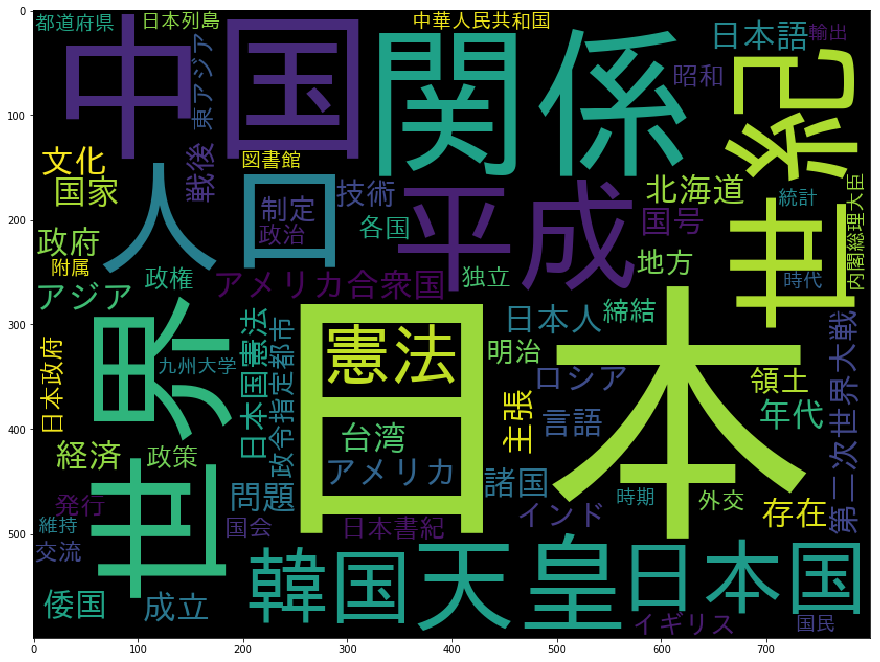

In [70]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)

In [58]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

/home/y-watanabe/.local/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
